# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

print("Starting Data Retrieval:")
print("------------------------")

# Create couters for control de set of cities retrieval
city_list = []
iterator_count = 0
set_count= 1
reg_count = 1

# For to print out sets of 50 cities
for city in cities:
    if (iterator_count % 50 == 0 and iterator_count >=50):
        reg_count = 1
        set_count += 1
    
    iterator_count += 1
    
    print(f"Processing Record {reg_count} of Set {set_count} | {city}")
    reg_count += 1
    
    # Request for city and create a data list
   
    endpoint = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q={city}"
    
    # Control of missing cities
    try:
        
        weather = requests.get(endpoint).json()
        date = pd.to_datetime(weather["dt"], unit='s')
        lat = weather["coord"]["lat"]
        long = weather["coord"]["lon"]
        hum = weather["main"]["humidity"]
        max_temp = weather["main"]["temp_max"]
        cld = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        
        city_list.append({
            "City": city,
            "Cloudiness": cld,
            "Country": country,
            "Date": date,
            "Humidity": hum,
            "Lat": lat,
            "Lng": long,
            "Max Temp": max_temp,
            "Wind Speed": wind_speed,
        })
        
    except:
        print("City not found. Skipping...")
        pass
    
    
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")
        

Starting Data Retrieval:
------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | ballina
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | khani
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | ambulu
Processing Record 14 of Set 1 | pemangkat
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | honiara
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | saint-joseph
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 1 | carnarvon


Processing Record 38 of Set 4 | kyaukse
Processing Record 39 of Set 4 | vardo
Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | camacha
Processing Record 42 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 43 of Set 4 | kuryk
Processing Record 44 of Set 4 | kamaishi
Processing Record 45 of Set 4 | kembe
Processing Record 46 of Set 4 | mariana
Processing Record 47 of Set 4 | tommot
Processing Record 48 of Set 4 | kabanjahe
Processing Record 49 of Set 4 | quijingue
Processing Record 50 of Set 4 | artyom
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | brae
Processing Record 3 of Set 5 | warangal
Processing Record 4 of Set 5 | fort worth
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | mazara del vallo
Processing Record 7 of Set 5 | waipawa
Processing Record 8 of Set 5 | vao
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | alofi
Processing Record 11 of Set 5 | beyneu
Processing Record 1

Processing Record 24 of Set 8 | tambopata
Processing Record 25 of Set 8 | san ramon
Processing Record 26 of Set 8 | serenje
Processing Record 27 of Set 8 | merke
Processing Record 28 of Set 8 | mayumba
Processing Record 29 of Set 8 | belyy yar
Processing Record 30 of Set 8 | avera
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | pontal do parana
Processing Record 33 of Set 8 | pedernales
Processing Record 34 of Set 8 | santo angelo
Processing Record 35 of Set 8 | kutahya
Processing Record 36 of Set 8 | margate
Processing Record 37 of Set 8 | zachary
Processing Record 38 of Set 8 | amderma
City not found. Skipping...
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | nador
Processing Record 41 of Set 8 | mehamn
Processing Record 42 of Set 8 | duz
City not found. Skipping...
Processing Record 43 of Set 8 | sunrise manor
Processing Record 44 of Set 8 | wum
Processing Record 45 of Set 8 | kayerkan
Processing Record 46 of Set 8 | baykit
Processin

Processing Record 8 of Set 12 | urusha
Processing Record 9 of Set 12 | pimentel
Processing Record 10 of Set 12 | half moon bay
Processing Record 11 of Set 12 | santa rosa
Processing Record 12 of Set 12 | cabras
Processing Record 13 of Set 12 | kutno
Processing Record 14 of Set 12 | inta
Processing Record 15 of Set 12 | vestmannaeyjar
Processing Record 16 of Set 12 | porto novo
Processing Record 17 of Set 12 | nurota
Processing Record 18 of Set 12 | huitziltepec
Processing Record 19 of Set 12 | paamiut
Processing Record 20 of Set 12 | batemans bay
Processing Record 21 of Set 12 | simao
Processing Record 22 of Set 12 | pasinler
Processing Record 23 of Set 12 | port hardy
Processing Record 24 of Set 12 | dandong
Processing Record 25 of Set 12 | bandar-e anzali
Processing Record 26 of Set 12 | kerema
Processing Record 27 of Set 12 | gravdal
Processing Record 28 of Set 12 | awjilah
Processing Record 29 of Set 12 | arman
Processing Record 30 of Set 12 | lolua
City not found. Skipping...
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(city_list)

In [5]:
weather_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,81,RU,2020-10-24 00:22:58,93,69.70,170.31,26.62,9.17
1,ballina,75,AU,2020-10-24 00:22:58,88,-28.87,153.57,73.40,9.17
2,cape town,90,ZA,2020-10-24 00:22:58,93,-33.93,18.42,62.01,6.93
3,kruisfontein,42,ZA,2020-10-24 00:22:59,87,-34.00,24.73,66.00,6.24
4,bengkulu,100,ID,2020-10-24 00:22:59,87,-3.80,102.27,76.53,4.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

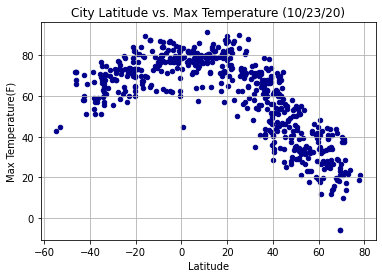

In [7]:
ax1 = weather_df.plot.scatter("Lat", "Max Temp", marker = "o",c="DarkBlue", title="City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature(F)")
ax1.grid('on')

plt.savefig("Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

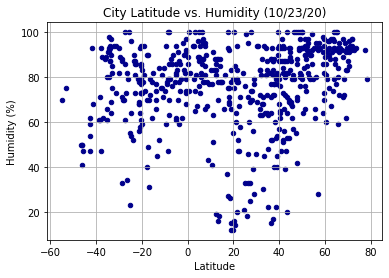

In [8]:
ax2 = weather_df.plot.scatter("Lat", "Humidity", marker = "o",c="DarkBlue", title="City Latitude vs. Humidity (%s)" % time.strftime("%x"))
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")
ax2.grid('on')

plt.savefig("Lat_Hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

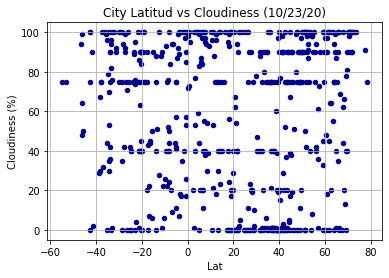

In [9]:
ax3 = weather_df.plot.scatter("Lat", "Cloudiness", marker = "o", c="DarkBlue", title="City Latitud vs Cloudiness (%s)" % time.strftime("%x"))
ax3.set_ylabel("Cloudiness (%)")
ax3.grid('on')
ax3.plot()

plt.savefig("Lat_Cloud.png")
plt.show()

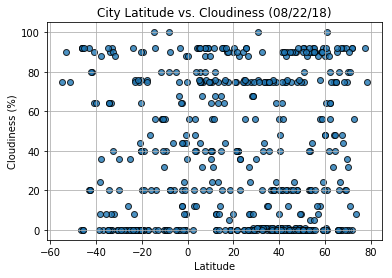

#### Latitude vs. Wind Speed Plot

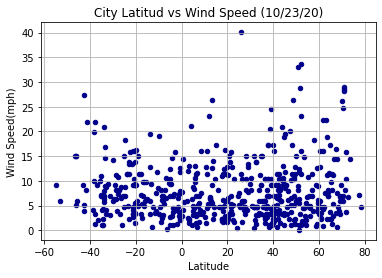

In [10]:
ax4 = weather_df.plot.scatter("Lat", "Wind Speed", marker = "o", c="DarkBlue", title="City Latitud vs Wind Speed (%s)" % time.strftime("%x"))
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed(mph)")
ax4.grid('on')
ax4.plot()

plt.savefig("Lat_Wind.png")
plt.show()

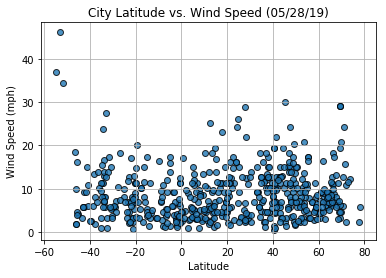

## Linear Regression

In [11]:
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,81,RU,2020-10-24 00:22:58,93,69.70,170.31,26.62,9.17
1,ballina,75,AU,2020-10-24 00:22:58,88,-28.87,153.57,73.40,9.17
2,cape town,90,ZA,2020-10-24 00:22:58,93,-33.93,18.42,62.01,6.93
3,kruisfontein,42,ZA,2020-10-24 00:22:59,87,-34.00,24.73,66.00,6.24
4,bengkulu,100,ID,2020-10-24 00:22:59,87,-3.80,102.27,76.53,4.59


In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Create x,y values for linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # Create a linear equation to show in the plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create the Linear Regression Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")


In [18]:
# Create Northern and Southern Hemisphere DataFrames

north_lat_df = weather_df.loc[weather_df["Lat"] >= 0,:]
south_lat_df = weather_df.loc[weather_df["Lat"] < 0,:]



In [19]:
south_lat_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,ballina,75,AU,2020-10-24 00:22:58,88,-28.87,153.57,73.40,9.17
2,cape town,90,ZA,2020-10-24 00:22:58,93,-33.93,18.42,62.01,6.93
3,kruisfontein,42,ZA,2020-10-24 00:22:59,87,-34.00,24.73,66.00,6.24
4,bengkulu,100,ID,2020-10-24 00:22:59,87,-3.80,102.27,76.53,4.59
5,bluff,94,NZ,2020-10-24 00:22:59,50,-46.60,168.33,72.00,15.01


In [20]:
north_lat_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,81,RU,2020-10-24 00:22:58,93,69.70,170.31,26.62,9.17
9,khani,0,GE,2020-10-24 00:23:00,66,41.96,42.96,51.80,2.24
12,pemangkat,95,ID,2020-10-24 00:23:01,82,1.17,108.97,79.23,5.70
15,kavaratti,96,IN,2020-10-24 00:23:02,77,10.57,72.64,80.17,12.82
20,barrow,90,US,2020-10-24 00:23:03,92,71.29,-156.79,28.40,8.05


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8579862760891293


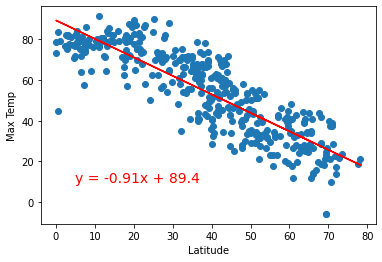

In [21]:
x_values = north_lat_df["Lat"]
y_values = north_lat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(5,10))

plt.savefig("Northern_maxtemp_lat.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5874445839112893


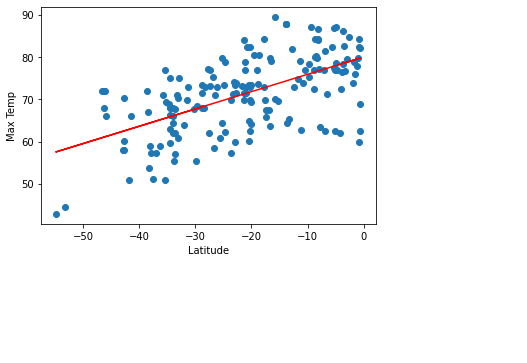

In [22]:
x_values = south_lat_df["Lat"]
y_values = south_lat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(5,10))

plt.savefig('Southern_maxtemp_lat.png')
plt.show()

The r-squared is: 0.760263355051646


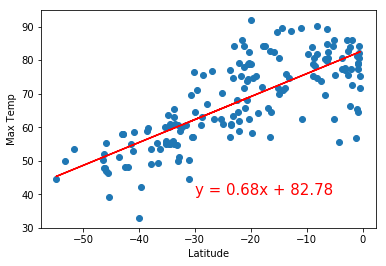

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24806976282916388


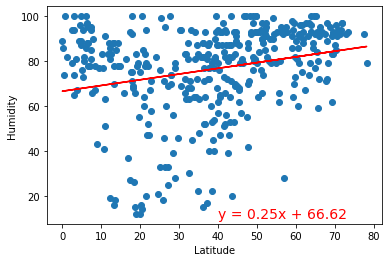

In [23]:
x_values = north_lat_df["Lat"]
y_values = north_lat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(40,10))

plt.savefig('Northern_hum_lat.png')
plt.show()

The r-squared is: 0.10358336015746494


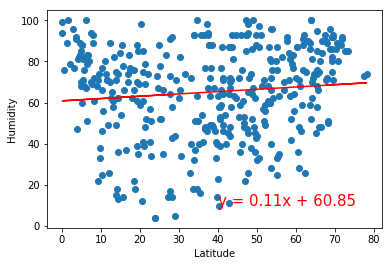

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16166367948517793


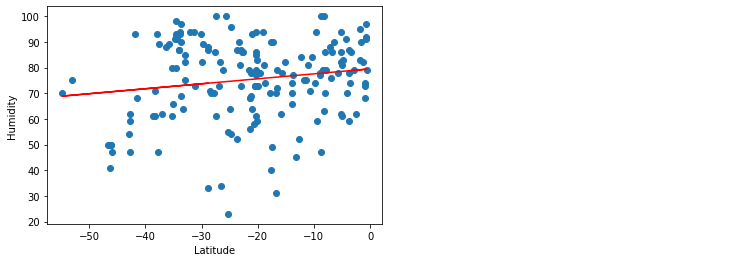

In [24]:
x_values = south_lat_df["Lat"]
y_values = south_lat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(40,10))

plt.savefig('Southern_hum_lat.png')
plt.show()

The r-squared is: 0.14689473425583055


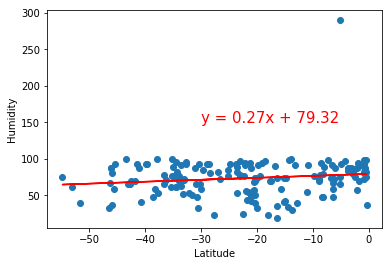

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09842643950361052


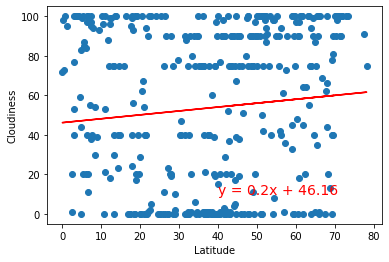

In [25]:
x_values = north_lat_df["Lat"]
y_values = north_lat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(40,10))

plt.savefig('Northern_cloud_lat.png')
plt.show()

The r-squared is: -0.08733547918934018


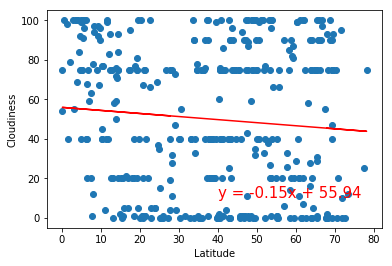

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1013656258306784


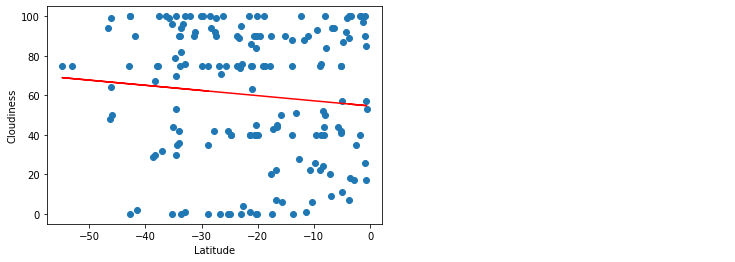

In [26]:
x_values = south_lat_df["Lat"]
y_values = south_lat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(40,10))

plt.savefig('Southern_cloud_lat.png')
plt.show()

The r-squared is: 0.21881426893991618


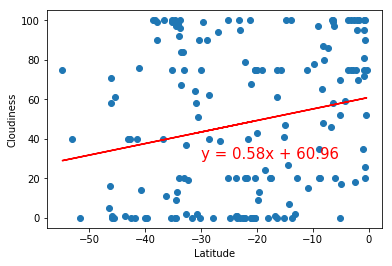

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12751941327692173


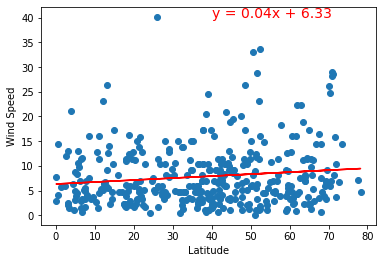

In [27]:
x_values = north_lat_df["Lat"]
y_values = north_lat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(40,40))

plt.savefig('Northern_wind_lat.png')
plt.show()

The r-squared is: -0.20526943098733935


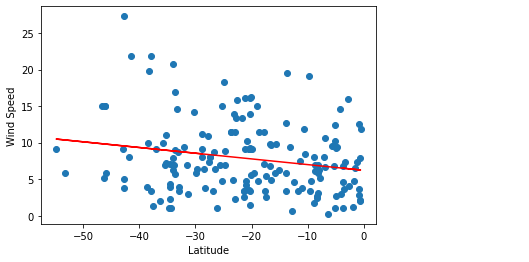

In [28]:
x_values = south_lat_df["Lat"]
y_values = south_lat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,10))

plt.savefig('Southern_wind_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


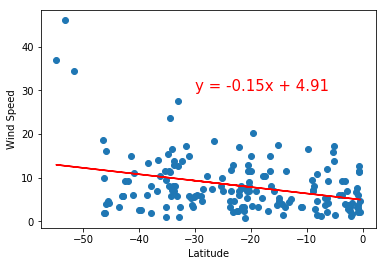

In [31]:
# Load base dataframe to a csv file
weather_df.to_csv('output_data/cities.csv', index= False)